In [1]:
file1=open('Feline_Leukemia.txt')
file1=file1.read()
file2=open('Bovine_Leukemia.txt')
file2=file2.read()
file3=open('Abelson_Murine_Leukemia.txt')
file3=file3.read()
pattern_6='ATGCAT'
pattern_5='ATGCA'
pattern_4='ATGC'
#print(file1)
#print(len(file1))

In [2]:
import csv

In [3]:
l1 = len(file1)
l2 = len(file2)
l3 = len(file3)

In [4]:
count=[]
iter_naive=[]
iter_kmp=[]
iter_bm=[]

In [5]:
def Naive(pat, txt):
    M = len(pat)
    N = len(txt)
    c=0
    iter1=0
    # A loop to slide pat[] one by one */
    for i in range(N - M + 1):
        j = 0
        iter1=iter1+1
        # For current index i, check
        # for pattern match */
        while(j < M):
            iter1=iter1+1
            if (txt[i + j] != pat[j]):
                iter1=iter1+1
                break
            j += 1
 
        if (j == M):
            iter1=iter1+1
            c=c+1
            #print("Pattern found at index ", i)
    #print("count",c)
    count.append(c)
    iter_naive.append(iter1)

In [6]:
def computeLPSArray(pat, M, lps):
    len = 0 # length of the previous longest prefix suffix
    iter2=0
    lps[0] # lps[0] is always 0
    i = 1
    # the loop calculates lps[i] for i = 1 to M-1
    while i < M:
        iter2=iter2+1
        if pat[i]== pat[len]:
            iter2=iter2+1
            len += 1
            lps[i] = len
            i += 1
        else:
            iter2=iter2+1
            # This is tricky. Consider the example.
            # AAACAAAA and i = 7. The idea is similar 
            # to search step.
            if len != 0:
                iter2=iter2+1
                len = lps[len-1]
  
                # Also, note that we do not increment i here
            else:
                iter2=iter2+1
                lps[i] = 0
                i += 1
    return iter2;
def KMP(pat, txt):
    #global iter2
    M = len(pat)
    N = len(txt)
    # create lps[] that will hold the longest prefix suffix 
    # values for pattern
    lps = [0]*M
    j = 0 # index for pat[]
    iter2_temp=0
    # Preprocess the pattern (calculate lps[] array)
    iter2_temp = computeLPSArray(pat, M, lps)
  
    i = 0 # index for txt[]
    while i < N:
        iter2_temp=iter2_temp+1
        if pat[j] == txt[i]:
            iter2_temp=iter2_temp+1
            i += 1
            j += 1
  
        if j == M:
            iter2_temp=iter2_temp+1
            #print ("Found pattern at index " + str(i-j))
            j = lps[j-1]
  
        # mismatch after j matches
        elif i < N and pat[j] != txt[i]:
            iter2_temp=iter2_temp+1
            # Do not match lps[0..lps[j-1]] characters,
            # they will match anyway
            if j != 0:
                iter2_temp=iter2_temp+1
                j = lps[j-1]
            else:
                iter2_temp=iter2_temp+1
                i += 1
    iter_kmp.append(iter2_temp);

In [7]:
NO_OF_CHARS = 256
def badCharHeuristic(string, size):
    '''
    The preprocessing function for
    Boyer Moore's bad character heuristic
    '''
    iter3=0
    # Initialize all occurrence as -1
    badChar = [-1]*NO_OF_CHARS
    # Fill the actual value of last occurrence
    for i in range(size):
        iter3=iter3+1
        badChar[ord(string[i])] = i;
    # return initialized list
    return badChar,iter3
  
def BM(txt, pat):
    '''
    A pattern searching function that uses Bad Character
    Heuristic of Boyer Moore Algorithm
    '''
    iter3_temp=0
    m = len(pat)
    n = len(txt)
    # create the bad character list by calling 
    # the preprocessing function badCharHeuristic()
    # for given pattern
    badChar,iter3_temp = badCharHeuristic(pat, m) 
  
    # s is shift of the pattern with respect to text
    s = 0
    while(s <= n-m):
        j = m-1
        iter3_temp=iter3_temp+1
        # Keep reducing index j of pattern while 
        # characters of pattern and text are matching
        # at this shift s
        while j>=0 and pat[j] == txt[s+j]:
            j -= 1
            iter3_temp=iter3_temp+1
        # If the pattern is present at current shift, 
        # then index j will become -1 after the above loop
        if j<0:
            iter3_temp=iter3_temp+1
            #print("Pattern occur at shift = {}".format(s))
            '''    
                Shift the pattern so that the next character in text
                      aligns with the last occurrence of it in pattern.
                The condition s+m < n is necessary for the case when
                   pattern occurs at the end of text
               '''
            s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
        else:
            iter3_temp=iter3_temp+1
            '''
               Shift the pattern so that the bad character in text
               aligns with the last occurrence of it in pattern. The
               max function is used to make sure that we get a positive
               shift. We may get a negative shift if the last occurrence
               of bad character in pattern is on the right side of the
               current character.
            '''
            s += max(1, j-badChar[ord(txt[s+j])])
    iter_bm.append(iter3_temp)

In [8]:
Naive(pattern_6,file1)
Naive(pattern_5,file1)
Naive(pattern_4,file1)
BM(file1,pattern_6)
BM(file1,pattern_5)
BM(file1,pattern_4)
KMP(pattern_6,file1)
KMP(pattern_5,file1)
KMP(pattern_4,file1)

Naive(pattern_6,file2)
Naive(pattern_5,file2)
Naive(pattern_4,file2)
BM(file2,pattern_6)
BM(file2,pattern_5)
BM(file2,pattern_4)
KMP(pattern_6,file2)
KMP(pattern_5,file2)
KMP(pattern_4,file2)

Naive(pattern_6,file3)
Naive(pattern_5,file3)
Naive(pattern_4,file3)
BM(file3,pattern_6)
BM(file3,pattern_5)
BM(file3,pattern_4)
KMP(pattern_6,file3)
KMP(pattern_5,file3)
KMP(pattern_4,file3)

In [9]:
#No.of.pattern matches for each file and for each pattern length
print(count)

[2, 9, 19, 0, 2, 32, 0, 1, 12]


In [10]:
#No.of.iterations for naive algorithm for each file and for each pattern length
print(iter_naive)

[28577, 28571, 28555, 27989, 27990, 27961, 19594, 19596, 19587]


In [11]:
#No.of.iterations for KMP algorithm for each file and for each pattern length
print(iter_kmp)

[27520, 27509, 27490, 26952, 26948, 26914, 18996, 18993, 18979]


In [12]:
#No.of.iterations for BM algorithm for each file and for each pattern length
print(iter_bm)

[10770, 12005, 11129, 10873, 11454, 12002, 6998, 8080, 8000]


In [13]:
#Analysis of time complexity of each algorithm
min_iter=[]
mapping = zip(iter_naive,iter_kmp,iter_bm)
tc=list(mapping)
for i in range(len(tc)):
    t1 = min(tc[i][0],tc[i][1],tc[i][2])
    mini = tc[i].index(t1)
    min_iter.append(mini)
f1=min_iter[0:3]
f2=min_iter[3:6]
f3=min_iter[6:9]
dict1 = {}
dict1[0] = f1.count(0)
dict1[1] = f1.count(1)
dict1[2] = f1.count(2)
dict2 = {}
dict2[0] = f2.count(0)
dict2[1] = f2.count(1)
dict2[2] = f2.count(2)
dict3 = {}
dict3[0] = f3.count(0)
dict3[1] = f3.count(1)
dict3[2] = f3.count(2)
f1_tc = max(zip(dict1.values(), dict1.keys()))[1]
f2_tc = max(zip(dict2.values(), dict2.keys()))[1]
f3_tc = max(zip(dict3.values(), dict3.keys()))[1]
tc = {0:'Naive', 1:'KMP', 2:'BM'}

In [14]:
fieldnames = ['Genome Name', 'Length of genome file', 'Match Percentage for read length-6 : [ATGCAT]', 'Match Percentage for read length-5 : [ATGCA]', 'Match Percentage for read length-4 : [ATGC]', 'Analysis of time complexity']
rows = [
    {'Genome Name' : 'Feline_Leukemia',
    'Length of genome file': l1,
    'Match Percentage for read length-6 : [ATGCAT]' : round((count[0]/l1)*100,4),
    'Match Percentage for read length-5 : [ATGCA]' : round((count[1]/l1)*100,4),
    'Match Percentage for read length-4 : [ATGC]' : round((count[2]/l1)*100,4),
    'Analysis of time complexity' : tc[f1_tc]
    },
    {'Genome Name' : 'Bovine_Leukemia',
    'Length of genome file': l2,
    'Match Percentage for read length-6 : [ATGCAT]' : round((count[3]/l2)*100,4),
    'Match Percentage for read length-5 : [ATGCA]' : round((count[4]/l2)*100,4),
    'Match Percentage for read length-4 : [ATGC]' : round((count[5]/l2)*100,4),
    'Analysis of time complexity' : tc[f2_tc]
    },
    {'Genome Name' : 'Abelson_Murine_Leukemia',
    'Length of genome file': l3,
    'Match Percentage for read length-6 : [ATGCAT]' : round((count[6]/l3)*100,4),
    'Match Percentage for read length-5 : [ATGCA]' : round((count[7]/l3)*100,4),
    'Match Percentage for read length-4 : [ATGC]' : round((count[8]/l3)*100,4),
    'Analysis of time complexity' : tc[f3_tc]
    }
]

with open('LEUKEMIA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

In [15]:
import numpy as np
arr1=np.arange(0,9)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
!pip install matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Iterations')

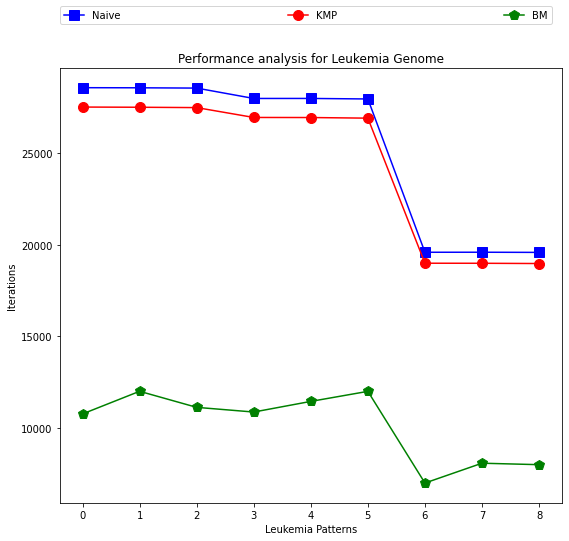

In [17]:
fig,axes=plt.subplots(figsize=(9,8))
axes.plot(arr1,iter_naive,color='blue',marker='s',markersize=10,label='Naive')
axes.plot(arr1,iter_kmp,color='red',marker='o',markersize=10,label='KMP')
axes.plot(arr1,iter_bm,color='green',marker='p',markersize=10,label='BM')
axes.set_title('Performance analysis for Leukemia Genome')
axes.legend(loc=(0,1.10),mode='expand',ncol=3)
axes.set_xlabel('Leukemia Patterns')
axes.set_ylabel('Iterations')